# Advanced Data Mining Project – Lab 4: Regression Analysis with Regularization Techniques
**Student Name:** Gaurab Karki  
**Course:** 2025 Fall - Advanced Big Data and Data Mining (MSCS-634-B01)

#### Step 1: Data Preparation 

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Explore data
print("Dataset shape:", X.shape)
print("\nFeature names:\n", X.columns)
print("\nFirst five rows:\n", X.head())
print("\nMissing values:\n", X.isnull().sum())

Dataset shape: (442, 10)

Feature names:
 Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

First five rows:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Missing values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


#### Step 2: Linear Regression 

Simple Linear Regression Metrics:
MAE: 52.25997644534553
MSE: 4061.8259284949263
RMSE: 63.73245584860924
R²: 0.2333503981587215


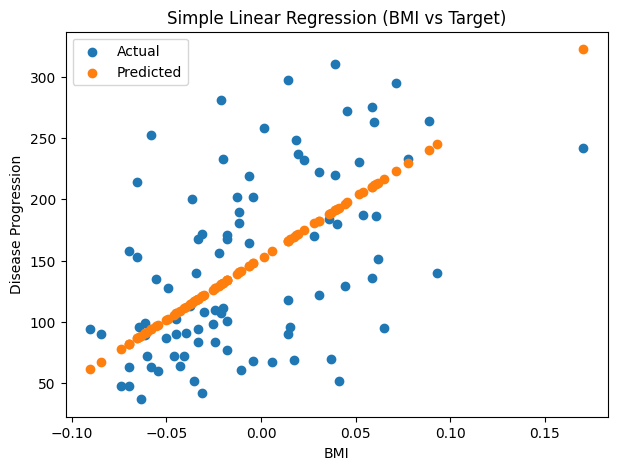

In [33]:
# Use one feature (BMI)
X_single = X[['bmi']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Model training
lr_single = LinearRegression()
lr_single.fit(X_train, y_train)

# Predictions
y_pred_single = lr_single.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_single)
mse = mean_squared_error(y_test, y_pred_single)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_single)

print("Simple Linear Regression Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred_single, label="Predicted")
plt.title("Simple Linear Regression (BMI vs Target)")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

#### Step 3: Multiple Regression 

Multiple Regression Metrics:
MAE: 42.794094679599944
MSE: 2900.1936284934827
RMSE: 53.85344583676594
R²: 0.45260276297191915


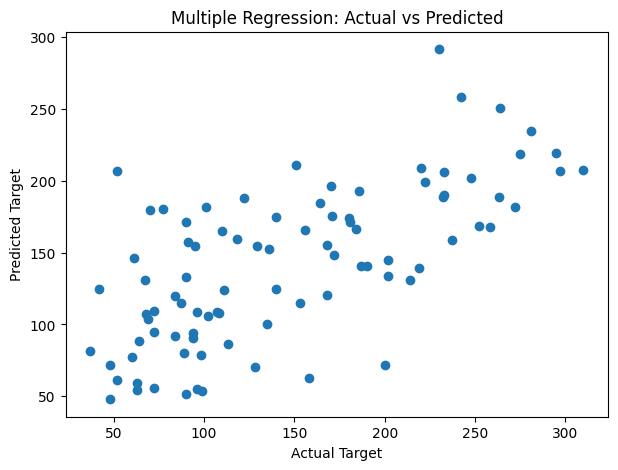

In [34]:
# Train-test split for multiple regression
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Predictions
y_pred_multi = lr_multi.predict(X_test_m)

# Metrics
print("Multiple Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_multi)))
print("R²:", r2_score(y_test_m, y_pred_multi))

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test_m, y_pred_multi)
plt.title("Multiple Regression: Actual vs Predicted")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.show()

#### Step 4: Polynomial Regression 


Polynomial Regression (Degree 2) Metrics:
MAE: 52.38391176015265
MSE: 4085.025480871632
RMSE: 63.91420406194254
R²: 0.2289715971205667


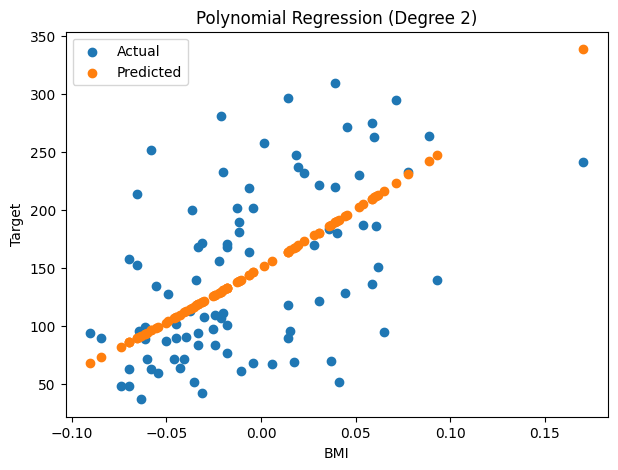


Polynomial Regression (Degree 3) Metrics:
MAE: 52.18140033344566
MSE: 4064.443383716435
RMSE: 63.752987253276494
R²: 0.2328563664009029


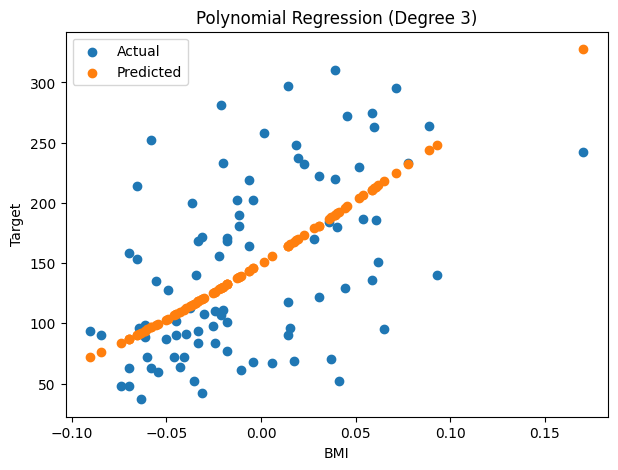

In [35]:
degrees = [2, 3]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_single)

    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_p, y_train_p)
    
    y_pred_poly = poly_reg.predict(X_test_p)
    
    print(f"\nPolynomial Regression (Degree {d}) Metrics:")
    print("MAE:", mean_absolute_error(y_test_p, y_pred_poly))
    print("MSE:", mean_squared_error(y_test_p, y_pred_poly))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_poly)))
    print("R²:", r2_score(y_test_p, y_pred_poly))

    # Visualization
    plt.figure(figsize=(7,5))
    plt.scatter(X_test_p[:,1], y_test_p, label="Actual")
    plt.scatter(X_test_p[:,1], y_pred_poly, label="Predicted")
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("BMI")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

#### Step 5: Regularization with Ridge and Lasso Regression 

In [36]:
alphas = [0.1, 1.0, 10.0]

# Ridge Regression
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_m, y_train_m)
    pred_ridge = ridge.predict(X_test_m)

    print(f"\nRidge Regression (alpha={a}) Metrics:")
    print("MAE:", mean_absolute_error(y_test_m, pred_ridge))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_m, pred_ridge)))
    print("R²:", r2_score(y_test_m, pred_ridge))

# Lasso Regression
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_m, y_train_m)
    pred_lasso = lasso.predict(X_test_m)

    print(f"\nLasso Regression (alpha={a}) Metrics:")
    print("MAE:", mean_absolute_error(y_test_m, pred_lasso))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_m, pred_lasso)))
    print("R²:", r2_score(y_test_m, pred_lasso))


Ridge Regression (alpha=0.1) Metrics:
MAE: 42.996932141596524
RMSE: 53.446111997699646
R²: 0.46085219464119265

Ridge Regression (alpha=1.0) Metrics:
MAE: 46.138857666974516
RMSE: 55.47446204180109
R²: 0.41915292635986545

Ridge Regression (alpha=10.0) Metrics:
MAE: 58.030756410038286
RMSE: 66.66297800625937
R²: 0.161225867509881

Lasso Regression (alpha=0.1) Metrics:
MAE: 42.85442771664998
RMSE: 52.897953506442185
R²: 0.4718547867276227

Lasso Regression (alpha=1.0) Metrics:
MAE: 49.730327536622596
RMSE: 58.340172450954185
R²: 0.3575918767219115

Lasso Regression (alpha=10.0) Metrics:
MAE: 64.00646146990485
RMSE: 73.22249283682244
R²: -0.011962984778542296


#### Step 6: Model Comparison and Analysis 

## Step 6: Model Comparison and Analysis

### Model Performance Summary

- **Simple Linear Regression**  
  This model showed the lowest accuracy because it used only one feature. With such limited information, it was not able to capture the patterns in the dataset effectively.

- **Multiple Regression**  
  This model performed better than simple linear regression. By using all available features, it provided more accurate predictions and a stronger overall fit.

- **Polynomial Regression**  
  A degree-2 polynomial showed a small improvement over the linear models, suggesting that the dataset has mild nonlinear behavior.  
  Increasing the degree further (e.g., degree 3) led to overfitting, where the model fit the training data well but performed worse on the test data.

- **Ridge Regression**  
  Ridge helped reduce overfitting by shrinking large coefficients. It kept all features and produced stable, balanced predictions.

- **Lasso Regression**  
  Lasso also controlled overfitting but went further by removing less important features entirely. This made the model simpler and easier to interpret while maintaining good predictive accuracy.

---

### Key Observations

- **Model performance:**  
  Multiple Regression was the best-performing linear model.  
  Polynomial Regression helped slightly with low degrees but caused overfitting at higher degrees.  
  Ridge and Lasso provided stronger generalization than simple linear models.

- **Handling overfitting:**  
  High-degree polynomial models began to overfit.  
  Ridge reduced overfitting without removing features.  
  Lasso reduced overfitting *and* simplified the model through feature selection.

- **Insights about the Diabetes dataset:**  
  The dataset is mostly linear, with only mild nonlinear relationships.  
  Some features are stronger predictors than others, which is why Lasso can remove weaker ones without harming results.  
  Regularization is useful because it stabilizes the model and prevents coefficients from becoming too large or sensitive to noise.
